In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_path="/content/drive/MyDrive/Dataset/train"
test_path="/content/drive/MyDrive/Dataset/test"
val_path="/content/drive/MyDrive/Dataset/validation"

In [13]:
# Set parameters
IMG_SIZE = 300
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 30

In [14]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

Found 8007 images belonging to 30 classes.


In [19]:
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

Found 1000 images belonging to 30 classes.


In [20]:
test_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42
)

Found 1000 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
history_fine = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
251/251 [==============================] - 2544s 10s/step - loss: 1.6911 - accuracy: 0.6297 - val_loss: 4.1303 - val_accuracy: 0.0430
Epoch 2/20
251/251 [==============================] - 369s 1s/step - loss: 0.3493 - accuracy: 0.8985 - val_loss: 3.6867 - val_accuracy: 0.2180
Epoch 3/20
251/251 [==============================] - 373s 1s/step - loss: 0.2072 - accuracy: 0.9397 - val_loss: 0.9664 - val_accuracy: 0.7330
Epoch 4/20
251/251 [==============================] - 365s 1s/step - loss: 0.1440 - accuracy: 0.9578 - val_loss: 0.7991 - val_accuracy: 0.7510
Epoch 5/20
251/251 [==============================] - 365s 1s/step - loss: 0.1051 - accuracy: 0.9689 - val_loss: 1.0821 - val_accuracy: 0.6910
Epoch 6/20
251/251 [==============================] - 363s 1s/step - loss: 0.0759 - accuracy: 0.9775 - val_loss: 0.7238 - val_accuracy: 0.7850
Epoch 7/20
251/251 [==============================] - 364s 1s/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.8435 - val_accuracy: 0.74

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

32/32 - 13s - loss: 1.0738 - accuracy: 0.7280 - 13s/epoch - 413ms/step

Test accuracy: 0.7279999852180481


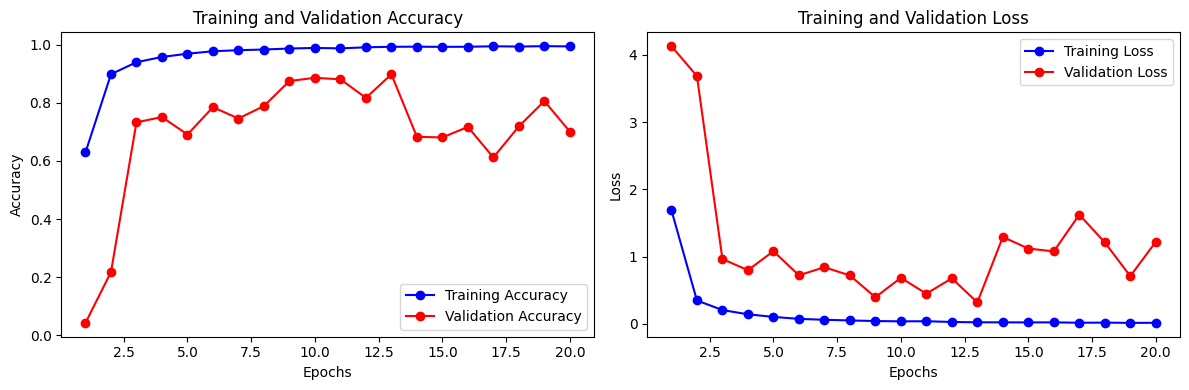

In [8]:
import matplotlib.pyplot as plt

# Lists of values
train_acc = [0.6297, 0.8985, 0.9397, 0.9578, 0.9689, 0.9775, 0.9810, 0.9834, 0.9868, 0.9888, 0.9873, 0.9910, 0.9928, 0.9931, 0.9926, 0.9929, 0.9945, 0.9936, 0.9949, 0.9941]
val_acc = [0.0430, 0.2180, 0.7330, 0.7510, 0.6910, 0.7850, 0.7460, 0.7890, 0.8750, 0.8860, 0.8810, 0.8170, 0.8980, 0.6830, 0.6810, 0.7170, 0.6120, 0.7190, 0.8060, 0.7010]
train_loss = [1.6911, 0.3493, 0.2072, 0.1440, 0.1051, 0.0759, 0.0628, 0.0524, 0.0437, 0.0390, 0.0409, 0.0298, 0.0249, 0.0243, 0.0232, 0.0241, 0.0184, 0.0202, 0.0163, 0.0177]
val_loss = [4.1303, 3.6867, 0.9664, 0.7991, 1.0821, 0.7238, 0.8435, 0.7217, 0.3977, 0.6858, 0.4503, 0.6789, 0.3201, 1.2933, 1.1218, 1.0795, 1.6260, 1.2117, 0.7113, 1.2215]

epochs = range(1, len(train_acc) + 1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import classification_report
model= tf.keras.models.load_model('/content/efficient_net.h5')

# Extract class labels from the test generator
class_labels = list(test_generator.class_indices.keys())
print(class_labels)

['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']


In [30]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

32/32 - 190s - loss: 1.0738 - accuracy: 0.7280 - 190s/epoch - 6s/step

Test accuracy: 0.7279999852180481


In [32]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=42,
    shuffle=False  # Ensure no shuffling for test set
)

Found 1000 images belonging to 30 classes.


In [37]:
print("Test Generator Class Indices:", test_generator.class_indices)

Test Generator Class Indices: {'Airport': 0, 'BareLand': 1, 'BaseballField': 2, 'Beach': 3, 'Bridge': 4, 'Center': 5, 'Church': 6, 'Commercial': 7, 'DenseResidential': 8, 'Desert': 9, 'Farmland': 10, 'Forest': 11, 'Industrial': 12, 'Meadow': 13, 'MediumResidential': 14, 'Mountain': 15, 'Park': 16, 'Parking': 17, 'Playground': 18, 'Pond': 19, 'Port': 20, 'RailwayStation': 21, 'Resort': 22, 'River': 23, 'School': 24, 'SparseResidential': 25, 'Square': 26, 'Stadium': 27, 'StorageTanks': 28, 'Viaduct': 29}


In [33]:
# Extract class labels from the test generator
class_labels = list(test_generator.class_indices.keys())
print(class_labels)

['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']


In [34]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

32/32 - 199s - loss: 1.0738 - accuracy: 0.7280 - 199s/epoch - 6s/step

Test accuracy: 0.7279999852180481


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Save the true labels before prediction
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print("Class Labels:", class_labels)

# Verify the order of true labels
print("Sample true labels before prediction:", y_true[:100])


Class Labels: ['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']
Sample true labels before prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


In [41]:
# Predict the classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Verify the order of predicted labels
print("Sample predicted labels:", y_pred[:100])

# Evaluate the model on test data again for verification
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


32/32 [==============================] - 191s 6s/step
Sample predicted labels: [ 0  0  0  0  0  0  0 10  0 10  0  0  0  0 10  0  0  0  0  0  0  0  0  0
  0  0  6  0  0  0 10  0  0  0 10  6  9  9  1  1 10  1  1  9 10  1  1  9
  1  1 10  9  9  1  1  1  1  1  9  1  9  1  9  9  9  1  9  2  2  2  2 19
  2 10  2  2 18  2  2  2  2 10  2 10 10  2 10  2  2  3  3  9  3  3  3  9
  3  3  3  3]
32/32 - 194s - loss: 1.0738 - accuracy: 0.7280 - 194s/epoch - 6s/step

Test accuracy: 0.7279999852180481


In [42]:
from sklearn.metrics import classification_report, accuracy_score
# Calculate accuracy manually
manual_accuracy = accuracy_score(y_true, y_pred)
print('\nAccuracy:', manual_accuracy)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)


Manual accuracy: 0.728
Classification Report:
                    precision    recall  f1-score   support

          Airport       1.00      0.81      0.89        36
         BareLand       0.89      0.52      0.65        31
    BaseballField       1.00      0.68      0.81        22
            Beach       0.62      0.62      0.62        40
           Bridge       0.96      0.64      0.77        36
           Center       0.79      0.88      0.84        26
           Church       0.53      0.88      0.66        24
       Commercial       0.90      0.54      0.68        35
 DenseResidential       0.97      0.68      0.80        41
           Desert       0.28      1.00      0.43        30
         Farmland       0.27      0.97      0.42        37
           Forest       0.89      0.32      0.47        25
       Industrial       0.96      0.69      0.81        39
           Meadow       0.75      0.11      0.19        28
MediumResidential       0.71      0.76      0.73        29
       

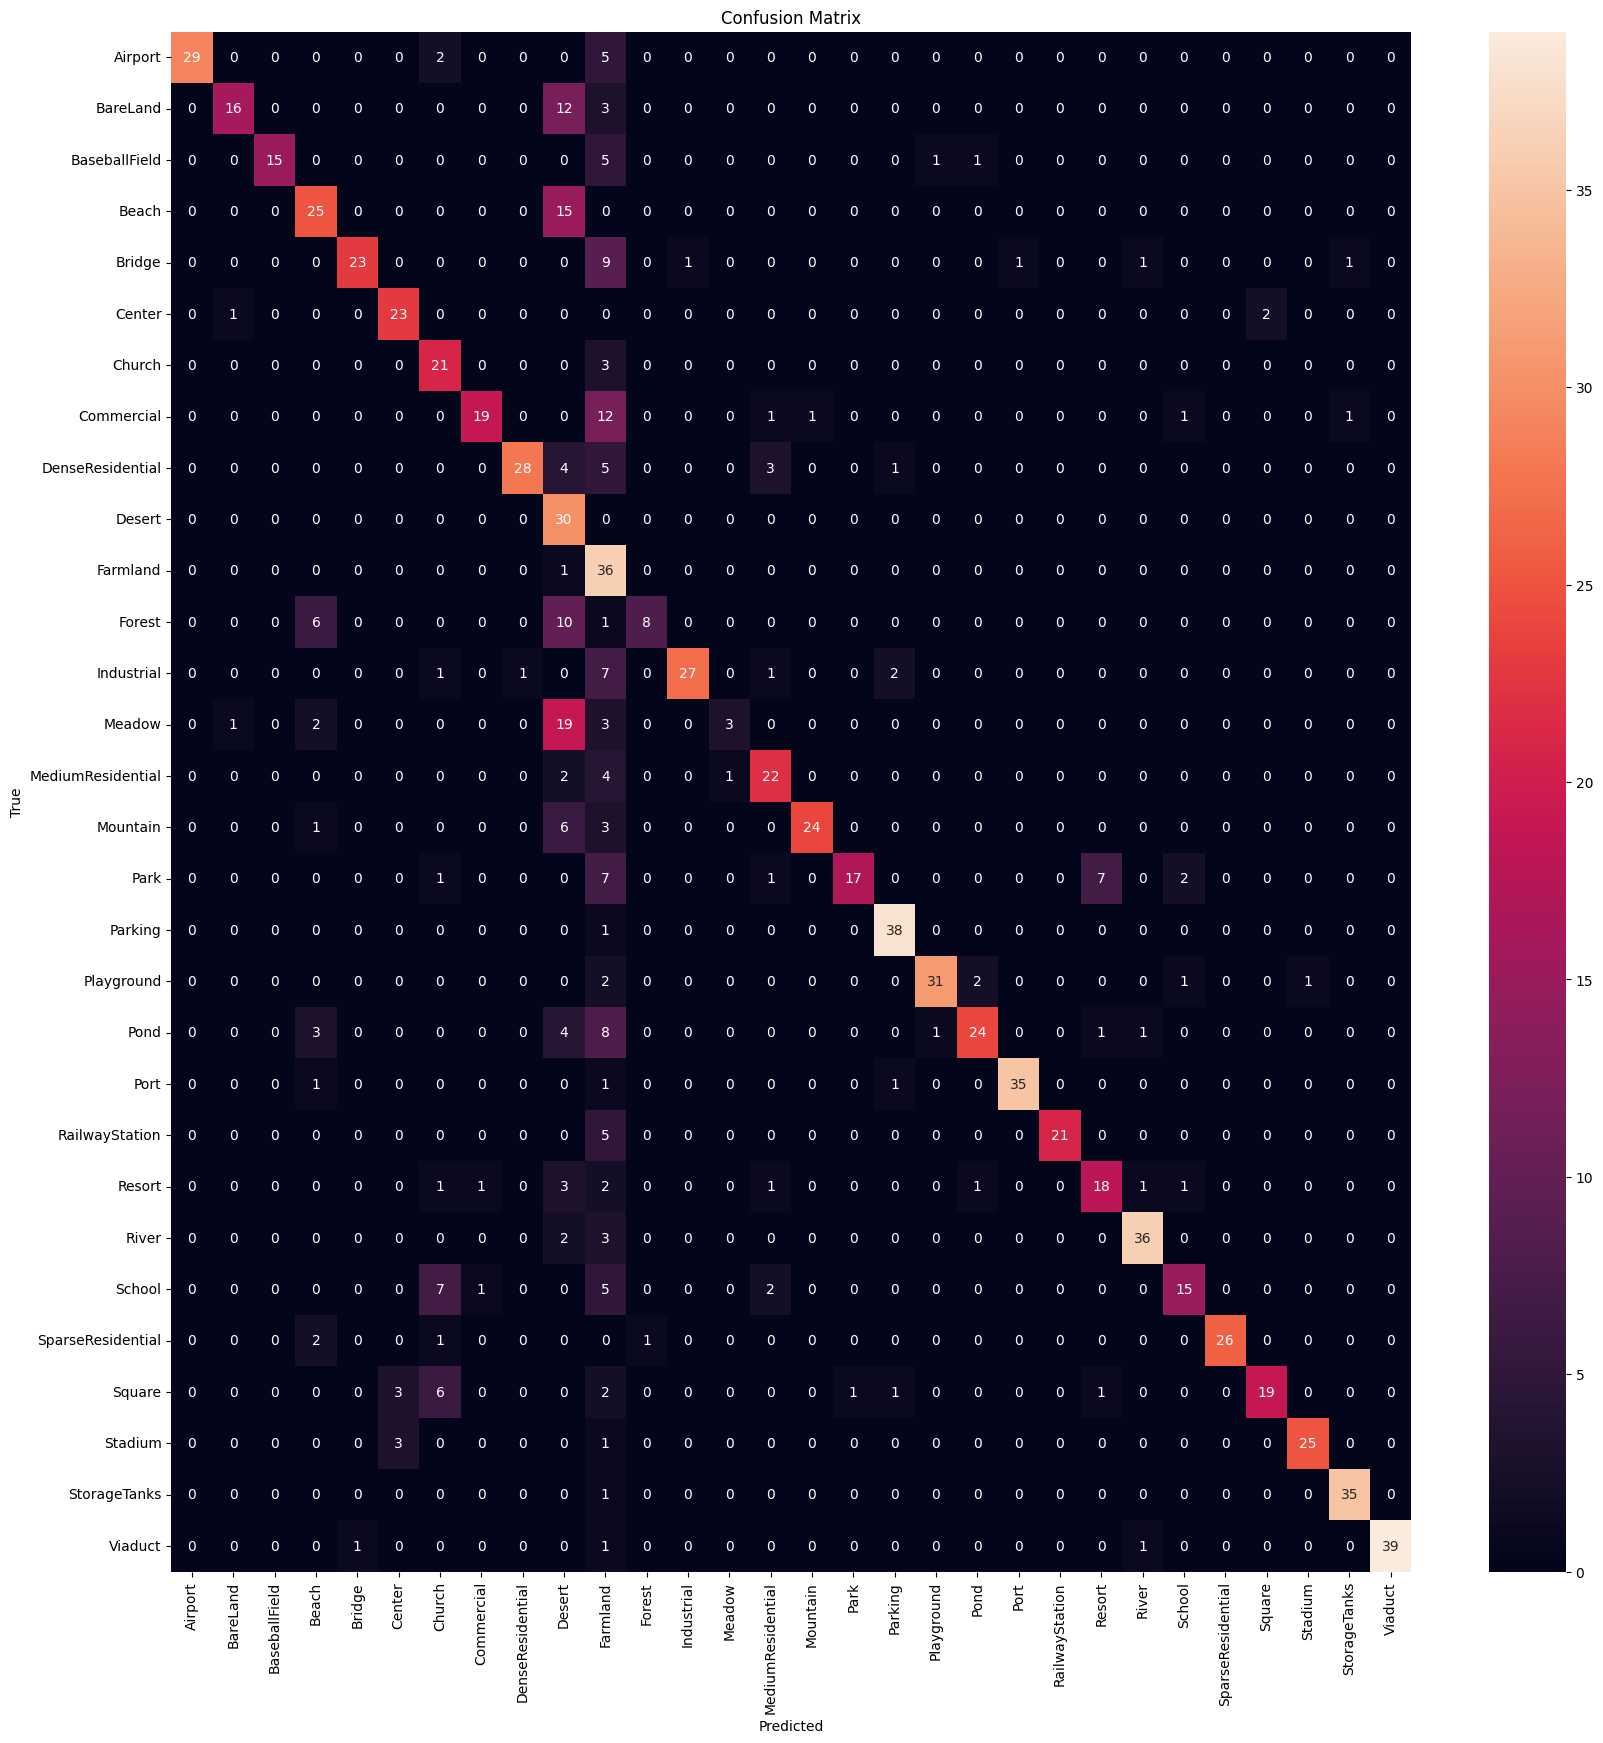

In [43]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()